In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [2]:
df=pd.read_csv('netflix_data.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
df.shape

(7787, 12)

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Find the Duplicates value

In [9]:
df.duplicated().sum()

0

In [10]:
df1=df[df.duplicated()]
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### FInd Null Values

In [11]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

show_id-0%
type-0%
title-0%
director-31%
cast-9%
country-7%
date_added-0%
release_year-0%
rating-0%
duration-0%
listed_in-0%
description-0%


In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

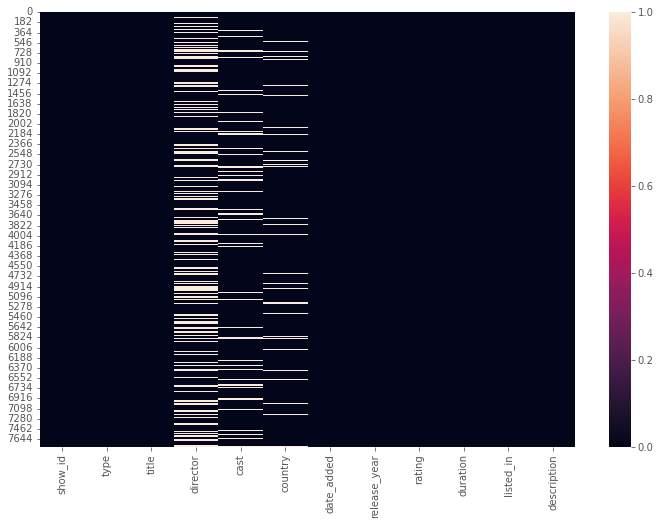

In [13]:
sns.heatmap(df.isnull())

### Remove Null Values / Data wrangling

In [14]:
df.drop(['cast'], axis=1, inplace=True)

In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
df['date_added']=df['date_added'].fillna('January 1, {}'.format(str(df['release_year'].mode()[0])))

In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
country          507
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [18]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [19]:
df.fillna({
    'country':'United States',
    'rating':'TV-MA',
    'director':'no director',
    'cast': 'no cast'
}, inplace=True)

In [20]:
df.isnull().sum().sum()

0

### Title = "House of Cards" Details

In [21]:
df[df['title'].isin(['House of Cards'])]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
2832,s2833,TV Show,House of Cards,no director,United States,"November 2, 2018",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


### Which year the highest number of the TV Show & Movie were released? Show with Bar Graph

In [22]:
df.groupby(['release_year'])['type'].value_counts()

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2019          TV Show    414
2020          TV Show    457
              Movie      411
2021          TV Show     19
              Movie       12
Name: type, Length: 118, dtype: int64

In [23]:
year_count=df['release_year'].value_counts().sort_values(ascending=False)
year_count=pd.DataFrame(year_count)
top_year_count=year_count[0:10]
top_year_count

,release_year
2018,1121
2017,1012
2019,996
2016,882
2020,868
2015,541
2014,334
2013,267
2012,219
2010,173


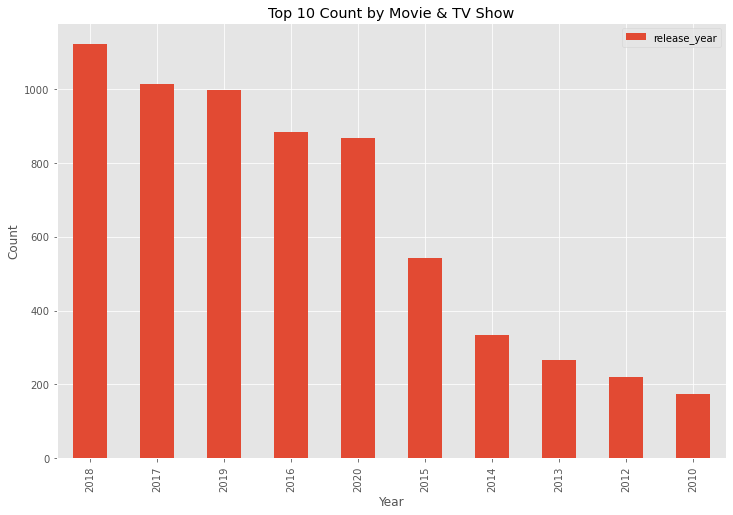

In [24]:
top_year_count.plot.bar()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 10 Count by Movie & TV Show')
plt.show()

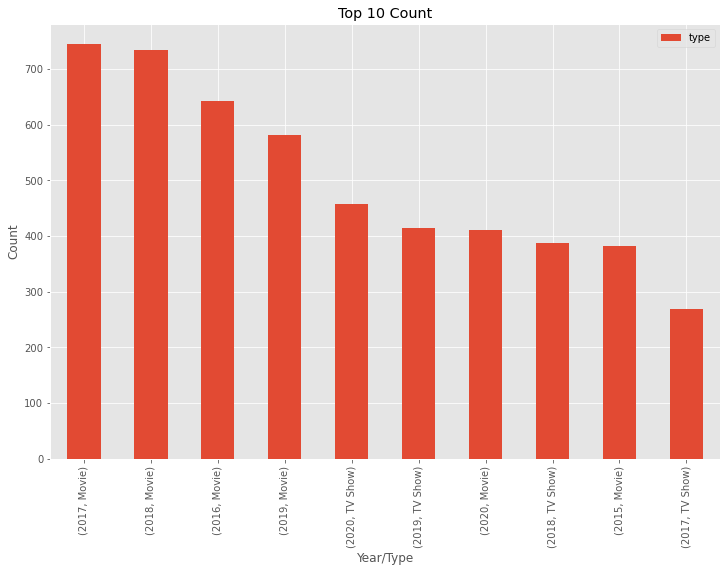

In [25]:
a1=df.groupby(['release_year'])['type'].value_counts().sort_values(ascending=False)
a1=pd.DataFrame(a1)
a2=a1[0:10]
a2.plot.bar()
plt.xlabel('Year/Type')
plt.ylabel('Count')
plt.title('Top 10 Count')
plt.show()

In [26]:
#a6=df.groupby(['release_year']).value_counts().sort_values(ascending=False)
#a6=pd.DataFrame(a6)
#a7=a6[0:10]
#a.plot.bar()

In [27]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,no director,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### How Many Movies & TV shows are in the dataset? Show Bar Graph

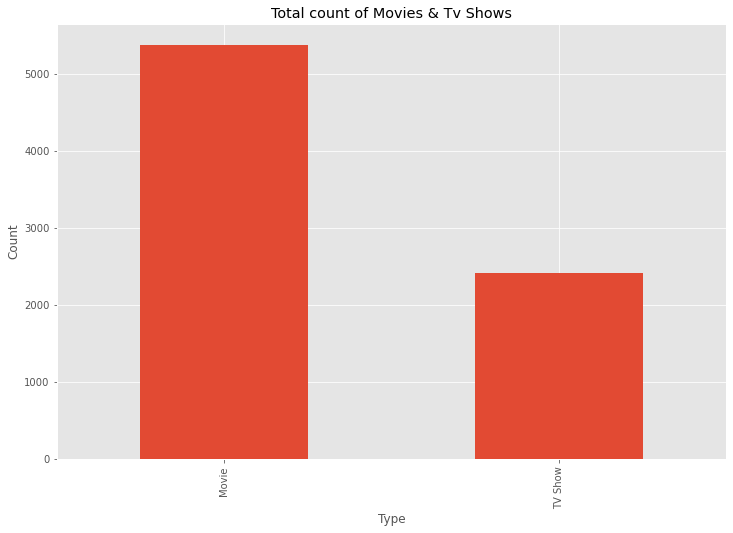

In [28]:
df['type'].value_counts().plot.bar()
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Total count of Movies & Tv Shows')
plt.show()

In [29]:
#df['type'].value_counts().plot.bar()
#plt.xlabel('Type')
#plt.ylabel('Count')
#plt.title('Total count of Movies & Tv Shows')
#plt.show()
#for index, df in enumerate(df['type'].value_counts()):
#    plt.text(x=index, y=df+70, s=f"{df}")
#plt.show()

### Show all the Movie that were released in year 2000

In [30]:
df[(df['type']=='Movie') & (df['release_year']==2000)]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
94,s95,Movie,28 Days,Betty Thomas,United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
473,s474,Movie,American Psycho,Mary Harron,"United States, Canada","September 1, 2019",2000,R,102 min,"Comedies, Cult Movies, Dramas",With chiseled good looks that belie his insani...
488,s489,Movie,An American Tail: The Treasures of Manhattan I...,Larry Latham,United States,"April 1, 2018",2000,G,79 min,Children & Family Movies,When Fievel and friends go hunting for buried ...
927,s928,Movie,Billy Elliot,Stephen Daldry,"United Kingdom, France","February 1, 2019",2000,R,110 min,"Dramas, Independent Movies, International Movies",When a boy trades boxing school for ballet les...
1256,s1257,Movie,Center Stage,Nicholas Hytner,United States,"January 1, 2020",2000,PG-13,116 min,Dramas,Vying for a spot in the American Ballet Compan...
1262,s1263,Movie,Chal Mere Bhai,David Dhawan,India,"December 31, 2019",2000,TV-14,132 min,"Comedies, International Movies, Romantic Movies","When a secretary saves her tycoon boss's life,..."
1280,s1281,Movie,Charlie's Angels,McG,"United States, Germany","October 1, 2019",2000,PG-13,98 min,"Action & Adventure, Comedies","Three beauties use their looks, charm and mart..."
1546,s1547,Movie,"Crouching Tiger, Hidden Dragon",Ang Lee,"Taiwan, Hong Kong, United States, China","March 1, 2019",2000,PG-13,120 min,"Action & Adventure, International Movies, Roma...",A young woman in ancient China longs for an ad...
1851,s1852,Movie,Dragonheart: A New Beginning,Doug Lefler,United States,"January 1, 2020",2000,PG,84 min,"Action & Adventure, Sci-Fi & Fantasy",This sequel introduces Draco the dragon's offs...
2163,s2164,Movie,Final Destination,James Wong,United States,"January 1, 2020",2000,R,98 min,"Cult Movies, Horror Movies, Thrillers",After narrowly avoiding a fatal plane explosio...


### Show only the Title of all TV Shows that were released in america only

In [31]:
df[df['country']=='United States']['title']

3                       9
4                      21
7                     187
10                   1922
14                   3022
              ...        
7774               Zodiac
7777          Zombie Dumb
7778           Zombieland
7781                 Zoom
7784    Zulu Man in Japan
Name: title, Length: 3062, dtype: object

In [32]:
df.loc[df['country']=='United States', 'title']

3                       9
4                      21
7                     187
10                   1922
14                   3022
              ...        
7774               Zodiac
7777          Zombie Dumb
7778           Zombieland
7781                 Zoom
7784    Zulu Man in Japan
Name: title, Length: 3062, dtype: object

### Show Top 10 Director, Who gave the highest number of TV Shows & Movies to Netflix

In [33]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,no director,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [34]:
top_dir=df['director'].value_counts().sort_values(ascending=False)
top_director=top_dir[1:11]
top_director

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Quentin Tarantino          8
Name: director, dtype: int64

### Show all the records where Type is Movie and category is comidies or country uk

In [35]:
df[(df['type']=='Movie')&(df['listed_in']=='Comedies')&(df['country']=='United Kingdom')]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
1368,s1369,Movie,Christmas Survival,James Dearden,United Kingdom,"November 1, 2019",2018,TV-MA,101 min,Comedies,"With Christmas just around the corner, sisters..."
1650,s1651,Movie,Dead in a Week (Or Your Money Back),Tom Edmunds,United Kingdom,"March 1, 2019",2018,TV-MA,90 min,Comedies,After several failed attempts at taking his ow...
2225,s2226,Movie,For Love or Money,Mark Murphy,United Kingdom,"August 16, 2019",2019,TV-MA,95 min,Comedies,When a goofy but likable millionaire discovers...
4210,s4211,Movie,"Monty Python Live (Mostly): One Down, Five to Go",Eric Idle,United Kingdom,"October 2, 2018",2014,TV-MA,137 min,Comedies,"Live from London in a sold-out final show, sur..."
4213,s4214,Movie,Monty Python: Live at The Hollywood Bowl,"Terry Hughes, Ian MacNaughton",United Kingdom,"October 2, 2018",1982,R,80 min,Comedies,Film clips and Terry Gilliam animations featur...
4781,s4782,Movie,Parrot Sketch Not Included: Twenty Years of Mo...,Ian MacNaughton,United Kingdom,"October 2, 2018",1989,TV-14,72 min,Comedies,"Presented by Steve Martin, this anthology draw..."
4792,s4793,Movie,PATRICK (2019),Mandie Fletcher,United Kingdom,"May 16, 2019",2019,TV-PG,94 min,Comedies,"When a schoolteacher inherits an adorable pug,..."
6108,s6109,Movie,The Bad Education Movie,Elliot Hegarty,United Kingdom,"December 15, 2018",2015,TV-MA,87 min,Comedies,Britain's most ineffective but caring teacher ...
6945,s6946,Movie,The Trip to Spain,Michael Winterbottom,United Kingdom,"December 12, 2017",2016,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...


In [36]:
df[(df['type']=='Movie')&(df['listed_in']=='Comedies')|(df['country']=='United Kingdom')]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
19,s20,Movie,'89,no director,United Kingdom,"May 16, 2018",2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
58,s59,TV Show,100% Hotter,no director,United Kingdom,"November 1, 2019",2017,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist..."
72,s73,Movie,17 Again,Burr Steers,United States,"January 1, 2021",2009,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,United Kingdom,"December 20, 2018",2018,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
...,...,...,...,...,...,...,...,...,...,...,...
7668,s7669,TV Show,World War II in Colour,no director,United Kingdom,"August 1, 2017",2009,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...
7669,s7670,TV Show,World's Busiest Cities,no director,United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."
7686,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,United Kingdom,"March 18, 2020",2016,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."
7723,s7724,Movie,You Can Tutu,James Brown,United Kingdom,"December 31, 2017",2017,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...


### In how many Movie/TV Shows, Marcus Raboy was Director

In [37]:
df[(df['director']=='Marcus Raboy')]['type'].value_counts()

Movie      15
TV Show     1
Name: type, dtype: int64

In [38]:
df[(df['director']=='Marcus Raboy')]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
550,s551,Movie,Anthony Jeselnik: Fire in the Maternity Ward,Marcus Raboy,United States,"April 30, 2019",2019,TV-MA,64 min,Stand-Up Comedy,"Forging his own comedic boundaries, Anthony Je..."
1543,s1544,Movie,Cristela Alonzo: Lower Classy,Marcus Raboy,United States,"January 24, 2017",2017,TV-MA,67 min,Stand-Up Comedy,The irrepressible Alonzo skewers Latino stereo...
1585,s1586,Movie,"Dana Carvey: Straight White Male, 60",Marcus Raboy,United States,"November 4, 2016",2016,TV-MA,64 min,Stand-Up Comedy,Emmy-winning comedian Dana Carvey blends pitch...
1705,s1706,Movie,DeRay Davis: How to Act Black,Marcus Raboy,United States,"November 14, 2017",2017,TV-MA,66 min,Stand-Up Comedy,Dynamic comic DeRay Davis hits the stage like ...
3231,s3232,Movie,Judd Apatow: The Return,Marcus Raboy,United States,"December 12, 2017",2017,TV-MA,70 min,Stand-Up Comedy,Judd Apatow returns to stand-up comedy after 2...
3323,s3324,Movie,Katt Williams: Kattpacalypse,Marcus Raboy,United States,"July 3, 2018",2012,TV-MA,61 min,Stand-Up Comedy,Urban comic Katt Williams ushers in Kattpacaly...
3828,s3829,Movie,Lynne Koplitz: Hormonal Beast,Marcus Raboy,United States,"August 22, 2017",2017,TV-MA,51 min,Stand-Up Comedy,Unabashed comedian Lynne Koplitz offers a woma...
3945,s3946,Movie,Marlon Wayans: Woke-ish,Marcus Raboy,United States,"February 27, 2018",2018,TV-MA,67 min,Stand-Up Comedy,"Rollicking, outrageous and audacious, Marlon W..."
4124,s4125,Movie,Miranda Sings Live…Your Welcome,Marcus Raboy,United States,"June 4, 2019",2019,TV-14,62 min,Stand-Up Comedy,Viral video star Miranda Sings and her real-wo...
4797,s4798,TV Show,Patton Oswalt: I Love Everything,Marcus Raboy,United States,"May 19, 2020",2020,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Turning 50. Finding love again. Buying a house...


### What are the different Ratings defined by Netflix

In [39]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

### How many Movies got the 'TV-14' rating , in Canda

In [40]:
df['rating'].value_counts()

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [41]:
df[(df['country']=='Canada')&(df['rating']=='TV-14')&(df['type']=='Movie')]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
30,s31,Movie,#cats_the_mewvie,Michael Margolis,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
34,s35,Movie,#Roxy,Michael Kennedy,Canada,"April 10, 2019",2018,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
608,s609,Movie,At First Light,Jason Stone,Canada,"December 27, 2018",2018,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,Canada,"July 1, 2018",2018,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier",Canada,"November 12, 2017",2017,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Canada,"October 14, 2019",2019,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...
5335,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,Canada,"August 22, 2017",2016,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...
5392,s5393,Movie,Sardaar ji,Rohit Jugraj,Canada,"December 1, 2017",2015,TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...
6061,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,Canada,"July 1, 2019",2018,TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands..."
7023,s7024,Movie,The Wrong Babysitter,George Mendeluk,Canada,"June 18, 2019",2017,TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...


### How many TV Shows got the 'R' rating, after 2000?

In [42]:
df[(df['type']=='TV Show')&(df['release_year']>2000)&(df['rating']=='R')]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
4497,s4498,TV Show,Nobel,no director,Norway,"December 10, 2016",2016,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...
6435,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,United States,"April 25, 2019",2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...


### What is the maximum duration of a Movies/TV Show on Netflix?

In [43]:
df['duration'].dtypes

dtype('O')

In [44]:
df[(df['type']=='TV Show')]['duration'].max(axis=0, skipna=True)

'9 Seasons'

In [45]:
df[(df['type']=='Movie')]['duration'].max(axis=0, skipna=True)

'99 min'

### Which individual country has the highest No.of TV Shows?

In [46]:
df.country.value_counts()[:10]

United States     3062
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

In [47]:
df[(df['type'].isin(['TV Show']))]['country'].value_counts()[:5]

United States     982
United Kingdom    204
Japan             157
South Korea       147
India              71
Name: country, dtype: int64

### How we can sort the dataset by Year?

In [48]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,no director,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [49]:
df['release_year'].count()

7787

In [50]:
df.sort_values(by='release_year',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
2327,s2328,TV Show,Gabby's Dollhouse,no director,United States,"January 5, 2021",2021,TV-Y,1 Season,Kids' TV,"Cute cats, quirky crafts and colorful magic! J..."
4468,s4469,TV Show,Night Stalker: The Hunt for a Serial Killer,Tiller Russell,United States,"January 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries",Beneath the sunlit glamour of 1985 LA lurks a ...
2753,s2754,TV Show,History of Swear Words,no director,United States,"January 5, 2021",2021,TV-MA,1 Season,"Docuseries, TV Comedies","Nicolas Cage hosts this proudly profane, funny..."
5103,s5104,Movie,Ratones Paranoicos: The Band that Rocked Argen...,"Alejandro Ruax, Ramiro Martínez",United States,"January 6, 2021",2021,TV-MA,76 min,"Documentaries, International Movies, Music & M...","The irrepressible Ratones Paranoicos, Argentin..."
1355,s1356,Movie,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock,United States,"January 12, 2021",2021,TV-MA,98 min,Stand-Up Comedy,"In this extended cut of his 2018 special, Chri..."
...,...,...,...,...,...,...,...,...,...,...,...
7616,s7617,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
7342,s7343,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
6117,s6118,Movie,The Battle of Midway,John Ford,United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
4960,s4961,Movie,Prelude to War,Frank Capra,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


In [51]:
df.sort_values(by='release_year',ascending=True)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
4867,s4868,TV Show,Pioneers: First Women Filmmakers*,no director,United States,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
6117,s6118,Movie,The Battle of Midway,John Ford,United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
4960,s4961,Movie,Prelude to War,Frank Capra,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
7679,s7680,Movie,WWII: Report from the Aleutians,John Huston,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
7342,s7343,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
...,...,...,...,...,...,...,...,...,...,...,...
4173,s4174,TV Show,Monarca,no director,Mexico,"January 1, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...","After 20 years, Ana María returns to Mexico an..."
3822,s3823,TV Show,Lupin,no director,United States,"January 8, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Inspired by the adventures of Arsène Lupin, ge..."
980,s981,TV Show,Bling Empire,no director,United States,"January 15, 2021",2021,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...
1285,s1286,Movie,Charming,Ross Venokur,"Canada, United States, Cayman Islands","January 8, 2021",2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri..."


### Type is Movie and Category is Dramas
### or
### Type is TV Show and Category is Kids TV

In [52]:
df[(df['type']=='Movie')&(df['listed_in']=='Dramas') | (df['type']=='TV Show')&(df['listed_in']=='Kids TV')]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
4,s5,Movie,21,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
170,s171,Movie,A Family Man,Mark Williams,"Canada, United States","December 15, 2019",2016,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,United States,"October 1, 2011",1988,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr..."
295,s296,Movie,Across Grace Alley,Ralph Macchio,United States,"December 1, 2016",2013,TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be..."
...,...,...,...,...,...,...,...,...,...,...,...
7415,s7416,Movie,Victor,Brandon Dickerson,United States,"July 24, 2017",2015,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join..."
7420,s7421,Movie,Villain,Philip Barantini,United Kingdom,"September 5, 2020",2020,R,97 min,Dramas,"Fresh out of prison, an ex-con tries to save h..."
7447,s7448,Movie,VS.,Ed Lilly,United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...
7463,s7464,Movie,Wakefield,Robin Swicord,United States,"March 2, 2019",2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...
